In [4]:
%pip install -U ipykernel
%pip install hdfs

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import json
from kafka import KafkaConsumer
from hdfs import InsecureClient

hdfs_client = InsecureClient('http://localhost:50070', user='hdfs')

# Read the data.json file from HDFS
with hdfs_client.read('/kafka/hdfs/spotify_data/recommendation_data.json', encoding='utf-8') as reader:
    data_from_hdfs = reader.read()

# Print the data read from HDFS
print(data_from_hdfs)

{"key": null, "value": "{\"track_name\": \"Reach up to Mars (Martian Mix)\", \"artist_names\": [\"Earth People\", \"Pal Joey\"], \"available_markets\": [\"AR\", \"AU\", \"AT\", \"BE\", \"BO\", \"BR\", \"BG\", \"CA\", \"CL\", \"CO\", \"CR\", \"CY\", \"CZ\", \"DK\", \"DO\", \"DE\", \"EC\", \"EE\", \"SV\", \"FI\", \"FR\", \"GR\", \"GT\", \"HN\", \"HK\", \"HU\", \"IS\", \"IE\", \"IT\", \"LV\", \"LT\", \"LU\", \"MY\", \"MT\", \"MX\", \"NL\", \"NZ\", \"NI\", \"NO\", \"PA\", \"PY\", \"PE\", \"PH\", \"PL\", \"PT\", \"SG\", \"SK\", \"ES\", \"SE\", \"CH\", \"TW\", \"TR\", \"UY\", \"US\", \"GB\", \"AD\", \"LI\", \"MC\", \"ID\", \"JP\", \"TH\", \"VN\", \"RO\", \"IL\", \"ZA\", \"SA\", \"AE\", \"BH\", \"QA\", \"OM\", \"KW\", \"EG\", \"MA\", \"DZ\", \"TN\", \"LB\", \"JO\", \"PS\", \"IN\", \"BY\", \"KZ\", \"MD\", \"UA\", \"AL\", \"BA\", \"HR\", \"ME\", \"MK\", \"RS\", \"SI\", \"KR\", \"BD\", \"PK\", \"LK\", \"GH\", \"KE\", \"NG\", \"TZ\", \"UG\", \"AG\", \"AM\", \"BS\", \"BB\", \"BZ\", \"BT\", \"BW\",

      key                                              value  \
0    None  {"track_name": "Reach up to Mars (Martian Mix)...   
1    None  {"track_name": "Away in a Manger", "artist_nam...   
2    None  {"track_name": "I Remember", "artist_names": [...   
3    None  {"track_name": "Minha Ex", "artist_names": ["F...   
4    None  {"track_name": "Lyric Pieces, Book 3, Op. 43: ...   
..    ...                                                ...   
114  None  {"track_name": "Either Way (feat. Joey Bada$$)...   
115  None  {"track_name": "Just the Way You Are", "artist...   
116  None  {"track_name": "Sex With Me", "artist_names": ...   
117  None  {"track_name": "Crush", "artist_names": ["Yuna...   
118  None  {"track_name": "Venom - Music From The Motion ...   

                       topic  partition  offset      timestamp  
0    spotify_recommendations          0       0  1730960301411  
1    spotify_recommendations          0       1  1730960313534  
2    spotify_recommendations        

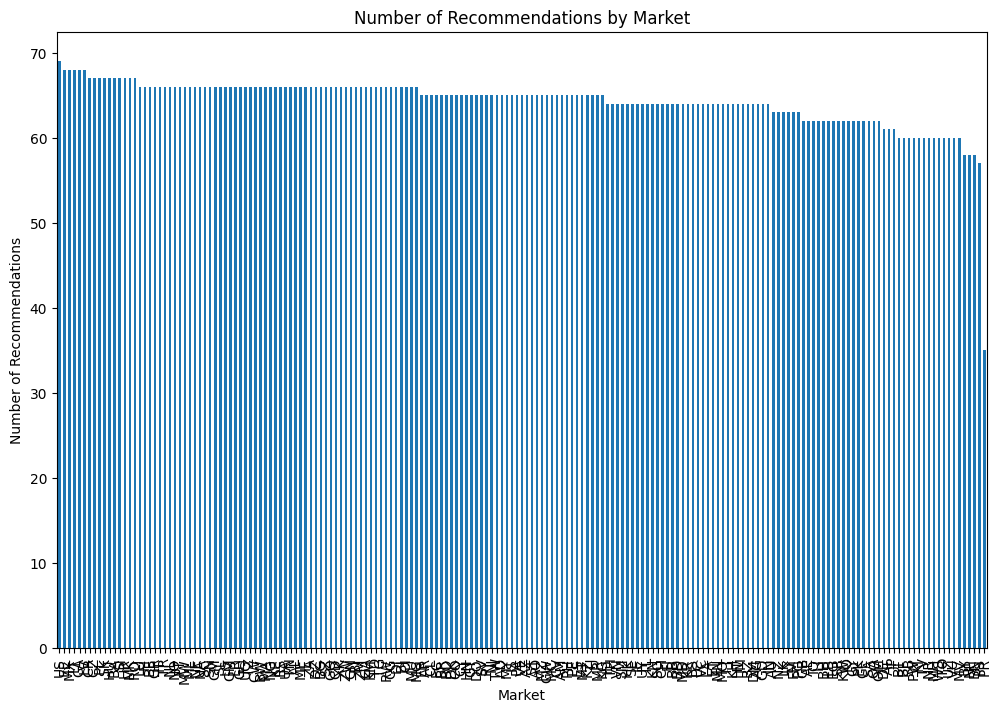

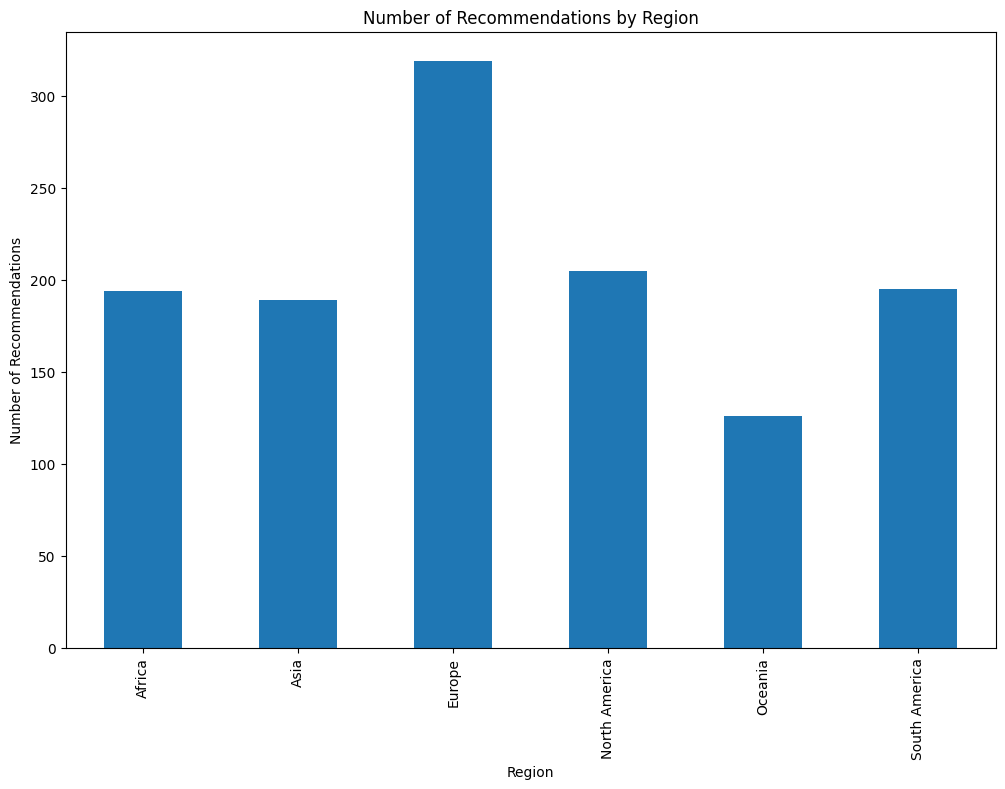

In [ ]:
import pandas as pd
import json

import matplotlib.pyplot as plt

# Load the data from the JSON string
data_list = [json.loads(line) for line in data_from_hdfs.split('\n') if line]

# Create a DataFrame from the data
df = pd.DataFrame(data_list)

# Extract the 'available_markets' from the 'value' field
df['available_markets'] = df['value'].apply(lambda x: json.loads(x)['available_markets'])

# Explode the 'available_markets' list into separate rows
df_exploded = df.explode('available_markets')

# Count the number of recommendations per market
market_counts = df_exploded['available_markets'].value_counts()

# Plot the data
plt.figure(figsize=(12, 8))
market_counts.plot(kind='bar')
plt.title('Number of Recommendations by Market')
plt.xlabel('Market')
plt.ylabel('Number of Recommendations')
plt.show()
# Define a mapping of markets to regions
market_to_region = {
    'US': 'North America', 'CA': 'North America', 'MX': 'North America',
    'AR': 'South America', 'BR': 'South America', 'CL': 'South America',
    'AU': 'Oceania', 'NZ': 'Oceania',
    'GB': 'Europe', 'FR': 'Europe', 'DE': 'Europe', 'IT': 'Europe', 'ES': 'Europe',
    'JP': 'Asia', 'KR': 'Asia', 'IN': 'Asia', 'CN': 'Asia',
    'ZA': 'Africa', 'NG': 'Africa', 'EG': 'Africa'
    # Add more mappings as needed
}

# Map the markets to regions
df_exploded['region'] = df_exploded['available_markets'].map(market_to_region)

# Group by region and count the number of recommendations
region_counts = df_exploded.groupby('region').size()

# Plot the data
plt.figure(figsize=(12, 8))
region_counts.plot(kind='bar')
plt.title('Number of Recommendations by Region')
plt.xlabel('Region')
plt.ylabel('Number of Recommendations')
plt.show()